In [16]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

1) UNDERSTANDING THE DATA

In [17]:
#Importing the data and viewing first 5 rows
df=pd.read_csv("dataset.csv")
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


2) CLEANING AND PRE-PROCESSING THE DATA

In [18]:
df['CONTENT_LENGTH']=df['CONTENT_LENGTH'].interpolate()
df['DNS_QUERY_TIMES']=df['DNS_QUERY_TIMES'].interpolate()
df['SERVER']=df['SERVER'].interpolate()


In [19]:
for data in [df]:
    data['URL_LENGTH'] = data['URL_LENGTH'].astype(str)
    data['NUMBER_SPECIAL_CHARACTERS'] = data['NUMBER_SPECIAL_CHARACTERS'].astype(str)
    data['CONTENT_LENGTH'] = data['CONTENT_LENGTH'].astype(str)
    data['TCP_CONVERSATION_EXCHANGE'] = data['TCP_CONVERSATION_EXCHANGE'].astype(str)
    data['DIST_REMOTE_TCP_PORT'] = data['DIST_REMOTE_TCP_PORT'].astype(str)
    data['REMOTE_IPS'] = data['REMOTE_IPS'].astype(str)
    data['APP_BYTES'] = data['APP_BYTES'].astype(str)
    data['SOURCE_APP_PACKETS'] = data['SOURCE_APP_PACKETS'].astype(str)
    data['REMOTE_APP_PACKETS'] = data['REMOTE_APP_PACKETS'].astype(str)
    data['SOURCE_APP_BYTES'] = data['SOURCE_APP_BYTES'].astype(str)
    data['REMOTE_APP_BYTES'] = data['REMOTE_APP_BYTES'].astype(str)
    data['APP_PACKETS'] = data['APP_PACKETS'].astype(str)
    data['DNS_QUERY_TIMES'] = data['DNS_QUERY_TIMES'].astype(str)
    

In [20]:
dependentVar = 'Type'
X = df.loc[:, df.columns != dependentVar]
y = df[dependentVar].values

In [21]:
X = pd.get_dummies(X)
sc = StandardScaler()
X= sc.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = None)

ENSEMBLE CLASSIFIER (VOTING CLASSIFIER)

In [12]:
estimators=[]
#accuracys=[]


#Creating a Naive Bayes Classifier and appending it to the estimator
model1=GaussianNB()
estimators.append(("Naive Bayes",model1))



#Creating a Random Forest Classifier and appending it to the estimator
model2=RandomForestClassifier()
estimators.append(("RandomForest",model2))



#Creating a Support Vector Classifier and appending it to the estimator
model3=SVC(probability = True)
estimators.append(("SVM",model3))



#CREATING A VOTING CLASSIFIER AND TRAINING IT USING THE TRAINING SETS
ensemble=VotingClassifier( estimators=[("Naive Bayes",model1), ("RandomForest",model2),("SVM",model3)], voting='soft')
ec=ensemble.fit(X_train,y_train)

# USING THE TRAINED MODEL TO PREDICT
target_pred=ec.predict(X_test)


#PRINTING THE ACCURACY OF THE ENSEMBLE (VOTING) CLASSIFIER
ensem_acc=accuracy_score(y_test,target_pred)
print("Accuracy of ensemble model is :",ensem_acc)


# PRINTING THE CONFUSION MATRIX AND CLASSIFICATION REPORT FOR THE ENSEMBLE(VOTING) CLASSIFIER
print(confusion_matrix(y_test,target_pred))
print(classification_report(y_test,target_pred))



Accuracy of ensemble model is : 0.969187675070028
[[313   2]
 [  9  33]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       315
           1       0.94      0.79      0.86        42

    accuracy                           0.97       357
   macro avg       0.96      0.89      0.92       357
weighted avg       0.97      0.97      0.97       357

Ensemble acc: 0.969187675070028


Plotting an ROC for the Ensemble (Voting) Classifier

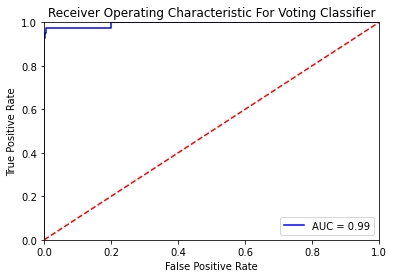

In [32]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the Naive Bayes classification
probs = ensemble.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic For Voting Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()